# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub

- Name: Ant Man
- GitHub Username: TheGOAT

# Research Question

Do parks with higher air qualities, more specifically, less PM2.5 pollution, receive higher ratings from visitors?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [103]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [132]:
parks = pd.read_csv('data/yelp_SD_parks.csv')


In [107]:
parks.shape

(833, 10)

In [159]:
cali = pd.read_csv('data/calenviroscreen-final-report.csv')

In [140]:
cali.shape

(8035, 52)

# Data Cleaning

### 1. yelp_SD_parks:
* I first checked the missingness in this dataset, found that 254 phone numbers are missing. Since I only consider the location and rating of parks, this is not a problem. Another missingness is the missing of latitude and longitude of Officer Christopher Wilson Memorial Park. Since there is only one review for it, I considered this park to be a less common one. Thus the deletion of it will not influence our overall result, so I dropped this row
* Since the data I need, rating and geospatial inforamtion, do not have missingness, I checked their type and range to make sure they are in correct form, and make adjustment in case any of these is in inconsistent format. Luckily, all three columns are in correct and consistent formats. Thus, no other cleaning is needed on this dataset. 
* I extract the columns that needed for my further analysis, name, rating, longitude and latitude



### 2. calenviroscreen-final-report:
* I took subset which only includes San Diego data from the whole CA dataset.
* I check and deal with null values. There is a few missingness in the dataset, but only one is missing considering the data I need, i.e. the PM2.5 data. I checked this and there was not much information about it. So I dropped this row.
* The geospatial data is not in a convenient format, so I extract longitude and latitude info from location column
* I extract the columns that needed for my further analysis, PM2.5, PM2.5 percentile, longitude and latitude I just extracted

In [119]:
### parks

In [106]:
parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [110]:
# check missingness of each col
parks.isnull().sum()

name              0
address           0
phone           254
id                0
url               0
rating            0
review_count      0
longitude         1
latitude          1
is_closed         0
dtype: int64

In [134]:
# look at the row with missing longitude and latitude
parks.loc[parks['longitude'].isnull()]

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
226,Officer Christopher Wilson Memorial Park,"San Diego, CA",NaN,fg97iBKVfgNgf3ehS6Rkvw,https://www.yelp.com/biz/officer-christopher-w...,4.0,1,NaN,NaN,False


In [135]:
# drop row with missing longitude and latitude
parks = parks.loc[parks['longitude'].isnull() == False]

In [136]:
parks.isnull().sum()

name              0
address           0
phone           253
id                0
url               0
rating            0
review_count      0
longitude         0
latitude          0
is_closed         0
dtype: int64

In [127]:
parks.latitude.dtype

dtype('float64')

In [128]:
parks.longitude.dtype

dtype('float64')

In [124]:
min(parks.latitude), max(parks.latitude)

(32.53267536, 34.29715665)

In [125]:
min(parks.longitude), max(parks.longitude)

(-118.64188, -116.3776179)

In [137]:
parks.rating.unique()

array([5. , 4.5, 3.5, 4. , 3. , 2.5, 1. , 1.5, 2. ])

In [129]:
### report

In [141]:
cali.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"


In [160]:
#only include data about San Diego
sd = cali[cali['California County'] == 'San Diego']

In [143]:
sd

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,32.9,94.47,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,27.3,90.59,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116..."
370,6073004900,5028,San Diego,NaN,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.430966,...,37.3,96.44,70.019802,94.09,13.77,72.61,77.443988,8.048304,92.80,"San Diego 92113\n(32.701852600000002, -117.138..."
466,6073003902,4927,San Diego,NaN,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.449528,...,37.2,96.43,76.470588,97.38,19.39,92.23,81.570728,8.477199,96.54,"San Diego 92113\n(32.696748999999997, -117.126..."
805,6073003901,4241,San Diego,NaN,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.469327,...,28.4,91.74,79.242069,98.29,28.52,99.12,81.980043,8.519704,96.81,"San Diego 92113\n(32.703556800000001, -117.126..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,6073008003,3334,San Diego,NaN,2.93,1-5% (lowest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001858,9.35,10.144104,...,0.0,0.00,15.695364,19.24,2.69,1.27,12.752349,1.325241,0.53,"San Diego 92109\n(32.804769200000003, -117.254..."
8020,6073005500,198,San Diego,NaN,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001295,6.98,10.462676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"San Diego 92134\n(32.724121500000003, -117.146..."
8021,6073006200,144,San Diego,NaN,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001210,6.62,10.330472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"San Diego 92101\n(32.731728599999997, -117.190..."
8022,6073006300,3435,San Diego,NaN,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001307,7.03,10.310135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"San Diego 92140\n(32.737718600000001, -117.197..."


In [146]:
sd.isnull().sum()

Census Tract                   0
Total Population               0
California County              0
Click for interactive map    627
CES 2.0 Score                  4
CES 2.0 Percentile Range       4
Hyperlink                      0
Ozone                          1
Ozone Pctl                     1
PM2.5                          1
PM2.5 Pctl                     1
Diesel PM                      0
Diesel PM Pctl                 0
Drinking Water                 1
Drinking Water Pctl            1
Pesticides                     0
Pesticides Pctl                0
Tox. Release                   0
Tox. Release Pctl              0
Traffic                        0
Traffic Pctl                   0
Cleanup Sites                  0
Cleanup Sites Pctl             0
Groundwater Threats            0
Groundwater Threats Pctl       0
Haz. Waste                     0
Haz. Waste Pctl                0
Imp. Water Bodies              0
Imp. Water Bodies Pctl         0
Solid Waste                    0
Solid Wast

In [148]:
sd[sd['PM2.5'].isnull()]

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
4098,6073021000,4440,San Diego,NaN,23.11,46-50%,http://oehha.maps.arcgis.com/apps/Viewer/index...,NaN,NaN,NaN,...,NaN,NaN,47.287341,71.44,13.46,70.94,57.725638,5.999127,64.3,"Borrego Springs 92004\n(33.1112185, -116.27356)"


In [149]:
#drop this null value in PM2.5 column
sd = sd[sd['PM2.5'].isnull() == False]

In [150]:
sd.head(2)

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,32.9,94.47,74.855946,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,27.3,90.59,76.636392,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116..."


In [151]:
# split location info to longitude and latitude

In [152]:
def longtitude(s):
    i1 = s.find('(')
    i2 = s.find(',')
    i3 = s.find(')')
    latitude = s[i1+1:i2]
    longitude = s[i2+ 2: i3]
    return longitude

def latitude(s):
    i1 = s.find('(')
    i2 = s.find(',')
    i3 = s.find(')')
    latitude = s[i1+1:i2]
    longitude = s[i2+ 2: i3]
    return latitude

In [161]:
sd['longitude'] = sd['Location 1'].apply(longtitude)
sd['latitude'] = sd['Location 1'].apply(latitude)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [162]:
sd.columns

Index(['Census Tract', 'Total Population', 'California County',
       'Click for interactive map', 'CES 2.0 Score',
       'CES 2.0 Percentile Range', 'Hyperlink', 'Ozone', 'Ozone Pctl', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
       'Pop. Ch

In [158]:
sd.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1,longtitude,latitude,longitude
165,6073005000,2227,San Diego,NaN,59.91,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000812,5.05,10.404164,...,96.65,NaN,NaN,80.024629,8.316532,95.15,"San Diego 92113\n(32.694850199999998, -117.141...",-117.1411746,32.694850199999998,-117.1411746
299,6073003601,3250,San Diego,NaN,55.61,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001435,7.59,10.460384,...,97.50,17.84,88.59,80.518487,8.367767,95.74,"San Diego 92113\n(32.690986199999998, -117.116...",-117.1165151,32.690986199999998,-117.1165151
370,6073004900,5028,San Diego,NaN,54.23,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000923,5.37,10.430966,...,94.09,13.77,72.61,77.443988,8.048304,92.80,"San Diego 92113\n(32.701852600000002, -117.138...",-117.138677,32.701852600000002,-117.138677
466,6073003902,4927,San Diego,NaN,52.48,91-95%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001166,6.44,10.449528,...,97.38,19.39,92.23,81.570728,8.477199,96.54,"San Diego 92113\n(32.696748999999997, -117.126...",-117.1263197,32.696748999999997,-117.1263197
805,6073003901,4241,San Diego,NaN,47.82,86-90%,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.001217,6.66,10.469327,...,98.29,28.52,99.12,81.980043,8.519704,96.81,"San Diego 92113\n(32.703556800000001, -117.126...",-117.12673770000001,32.703556800000001,-117.12673770000001


In [163]:
#take subset that only include info we want
sd = sd[['PM2.5','PM2.5 Pctl','longitude','latitude']]

In [164]:
sd.head()

,PM2.5,PM2.5 Pctl,longitude,latitude
165,10.404164,53.69,-117.1411746,32.694850199999998
299,10.460384,54.46,-117.1165151,32.690986199999998
370,10.430966,54.04,-117.138677,32.701852600000002
466,10.449528,54.23,-117.1263197,32.696748999999997
805,10.469327,54.63,-117.12673770000001,32.703556800000001


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [218]:
# visualize the park locations
gpark = geopandas.GeoDataFrame(
    parks, geometry=geopandas.points_from_xy(parks.longitude, parks.latitude))

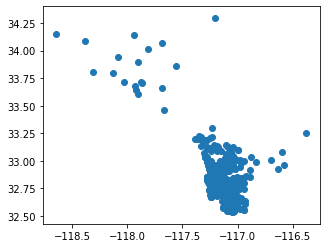

In [170]:
gpark.plot()

In [171]:
# visulize the SD locations in report

In [219]:
gsd = geopandas.GeoDataFrame(
    sd, geometry=geopandas.points_from_xy(sd.longitude,sd.latitude))

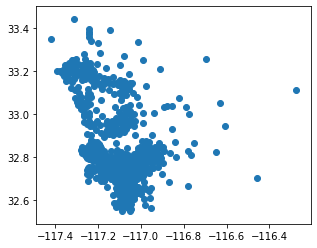

In [173]:
gsd.plot()

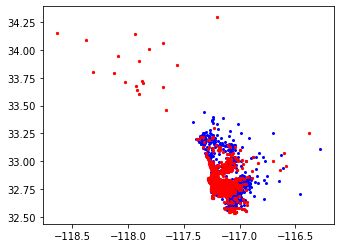

In [177]:
# layer two maps together to see any overlap

fig, ax = plt.subplots()

ax.set_aspect('equal')

gsd.plot(ax=ax, marker='o', color='blue', markersize=4)

gpark.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

In [193]:
# We can see there are many overlaps, so try to merge the two tables based on geospatial info
park_lo = list(parks.longitude)
park_lo.sort(reverse=True)
park_lo

[-116.3776179,
 -116.57910179999999,
 -116.60063170000001,
 -116.632974,
 -116.70059679999999,
 -116.83552820000001,
 -116.87471000000001,
 -116.8845749,
 -116.88643379999999,
 -116.92055500000001,
 -116.93011899999999,
 -116.93113729999999,
 -116.93403629999999,
 -116.937793,
 -116.93821899999999,
 -116.93954599999999,
 -116.94133640000001,
 -116.9423065,
 -116.9587281,
 -116.95945049999999,
 -116.962078,
 -116.96391000000001,
 -116.9692179,
 -116.972733,
 -116.97425859999998,
 -116.97543999999999,
 -116.9771004,
 -116.980512,
 -116.9825033,
 -116.98376999999999,
 -116.986622,
 -116.99090890000002,
 -116.995725,
 -116.995725,
 -116.99717790000001,
 -116.99759399999999,
 -116.999402,
 -117.001025,
 -117.0024642,
 -117.0026932,
 -117.003941,
 -117.00566599999999,
 -117.00577390000001,
 -117.0062713,
 -117.0079621,
 -117.00856499999999,
 -117.01123999999999,
 -117.0139449,
 -117.014784,
 -117.01487040000002,
 -117.0187497,
 -117.0188065,
 -117.02011940000001,
 -117.02087,
 -117.021351,
 

In [191]:
sd_lo = list(sd.longitude)
sd_lo.sort()
sd_lo

['-116.27356',
 '-116.456874',
 '-116.6067039',
 '-116.6289159',
 '-116.64734199999999',
 '-116.6970824',
 '-116.7519581',
 '-116.76413220000001',
 '-116.77422679999999',
 '-116.7811501',
 '-116.78185070000001',
 '-116.7875799',
 '-116.82310870000001',
 '-116.8356541',
 '-116.84182970000001',
 '-116.8524089',
 '-116.85384929999999',
 '-116.86313850000001',
 '-116.86871120000001',
 '-116.87661060000001',
 '-116.89359709999999',
 '-116.8941897',
 '-116.8973197',
 '-116.8984176',
 '-116.9017298',
 '-116.9069289',
 '-116.9101919',
 '-116.91065469999999',
 '-116.91224339999999',
 '-116.9141796',
 '-116.91777690000001',
 '-116.9179144',
 '-116.91971220000001',
 '-116.9264026',
 '-116.92702319999999',
 '-116.92865',
 '-116.9338156',
 '-116.9381289',
 '-116.9383632',
 '-116.9387595',
 '-116.9420918',
 '-116.9431653',
 '-116.9433532',
 '-116.94348770000001',
 '-116.94700829999999',
 '-116.94813929999999',
 '-116.9489803',
 '-116.94913459999999',
 '-116.9501576',
 '-116.9524957',
 '-116.9530603'

In [224]:
# try join two tables directly
geopandas.sjoin(gsd, gpark, how="inner", op='intersects')

,PM2.5,PM2.5 Pctl,longitude_left,latitude_left,geometry,index_right,name,address,phone,id,url,rating,review_count,longitude_right,latitude_right,is_closed


In [212]:
#buffer the locations in san diego data with diameters to intersect with park locations
g1 = gsd.copy()
g1.geometry = g1.geometry.buffer(0.01)

In [ ]:
gpark.

In [225]:
df = geopandas.sjoin(g1, gpark, how="inner", op='intersects')

In [226]:
df.head()

,PM2.5,PM2.5 Pctl,longitude_left,latitude_left,geometry,index_right,name,address,phone,id,url,rating,review_count,longitude_right,latitude_right,is_closed
165,10.404164,53.69,-117.1411746,32.694850199999998,"POLYGON ((-117.13117 32.69485, -117.13122 32.6...",167,Chicano Park,"National Ave & S Evans St San Diego, CA 92101",NaN,xQvC_q1hko49aKK_TuglZQ,https://www.yelp.com/biz/chicano-park-san-dieg...,4.5,86,-117.141790,32.69837,False
370,10.430966,54.04,-117.138677,32.701852600000002,"POLYGON ((-117.12868 32.70185, -117.12873 32.7...",167,Chicano Park,"National Ave & S Evans St San Diego, CA 92101",NaN,xQvC_q1hko49aKK_TuglZQ,https://www.yelp.com/biz/chicano-park-san-dieg...,4.5,86,-117.141790,32.69837,False
299,10.460384,54.46,-117.1165151,32.690986199999998,"POLYGON ((-117.10652 32.69099, -117.10656 32.6...",702,Dorothy Petway Neighborhood Park,"1315-1321 Rigel St San Diego, CA 92113",NaN,kaYL40OxDs76ghAUiGL8_A,https://www.yelp.com/biz/dorothy-petway-neighb...,1.5,3,-117.118942,32.69297,False
466,10.449528,54.23,-117.1263197,32.696748999999997,"POLYGON ((-117.11632 32.69675, -117.11637 32.6...",702,Dorothy Petway Neighborhood Park,"1315-1321 Rigel St San Diego, CA 92113",NaN,kaYL40OxDs76ghAUiGL8_A,https://www.yelp.com/biz/dorothy-petway-neighb...,1.5,3,-117.118942,32.69297,False
1222,10.490303,55.04,-117.1134902,32.698600399999997,"POLYGON ((-117.10349 32.69860, -117.10354 32.6...",702,Dorothy Petway Neighborhood Park,"1315-1321 Rigel St San Diego, CA 92113",NaN,kaYL40OxDs76ghAUiGL8_A,https://www.yelp.com/biz/dorothy-petway-neighb...,1.5,3,-117.118942,32.69297,False


In [ ]:
# drop redundant columns
df = df[['']]

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*